<a href="https://colab.research.google.com/github/AnaghaNithin/DSA-PythonCaseStudy/blob/main/Assignment_on_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [20]:
df=pd.read_csv('/content/Wine_clust.csv')


In [21]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [23]:
df=pd.get_dummies(df,dtype='int64')

In [24]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [25]:
df.isnull().sum()

,0
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


In [26]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)



In [27]:
# Find the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)


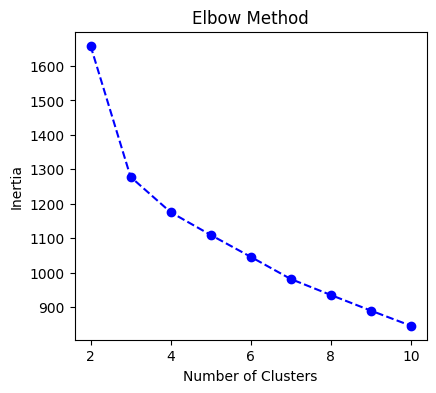

In [28]:
# Plot the Elbow Method
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [29]:
# Choose the optimal number of clusters based on the elbow point
optimal_k = 3
# Apply K-Means with optimal clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans_optimal.fit_predict(df_scaled)

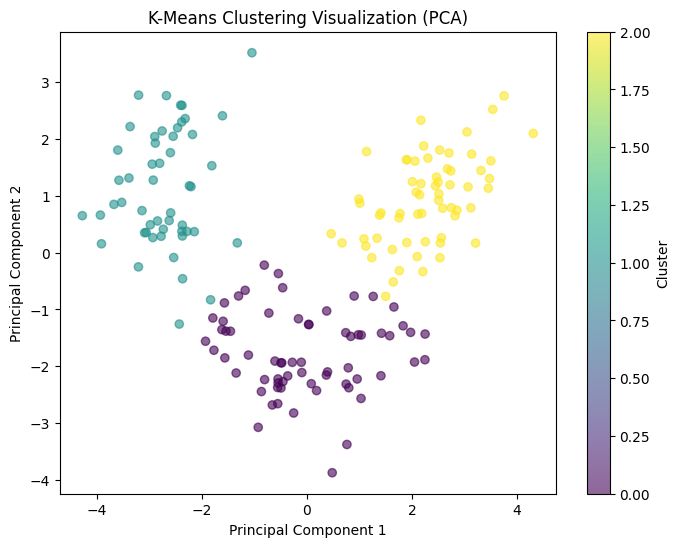

In [30]:
# Visualizing K-Means Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["KMeans_Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.colorbar(label="Cluster")
plt.show()


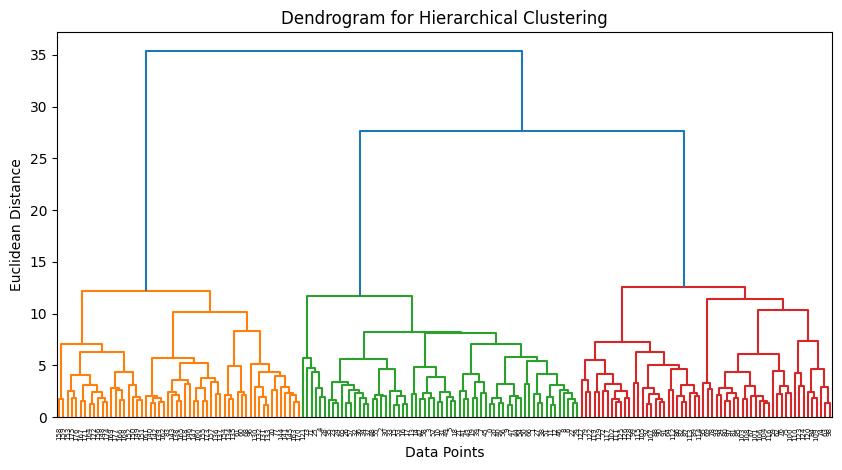

In [32]:
# HIERARCHICAL CLUSTERING
# Create the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(linkage(df_scaled, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [33]:
# Apply K-Means with optimal clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans_optimal.fit_predict(df_scaled)

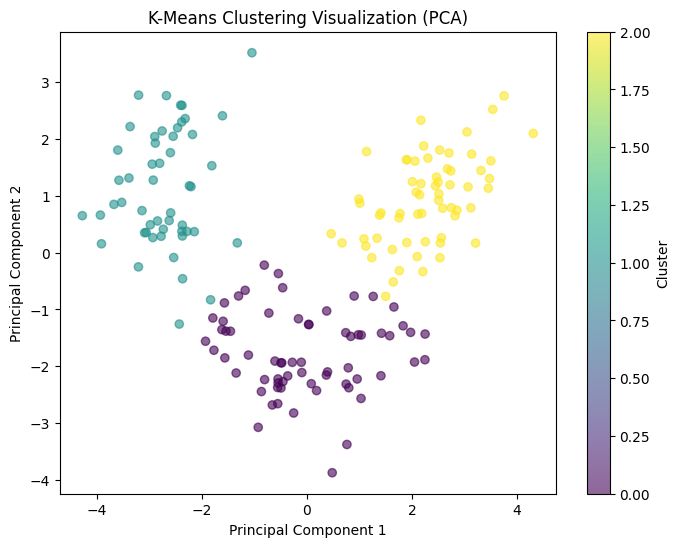

In [34]:
# Visualizing K-Means Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["KMeans_Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.colorbar(label="Cluster")
plt.show()

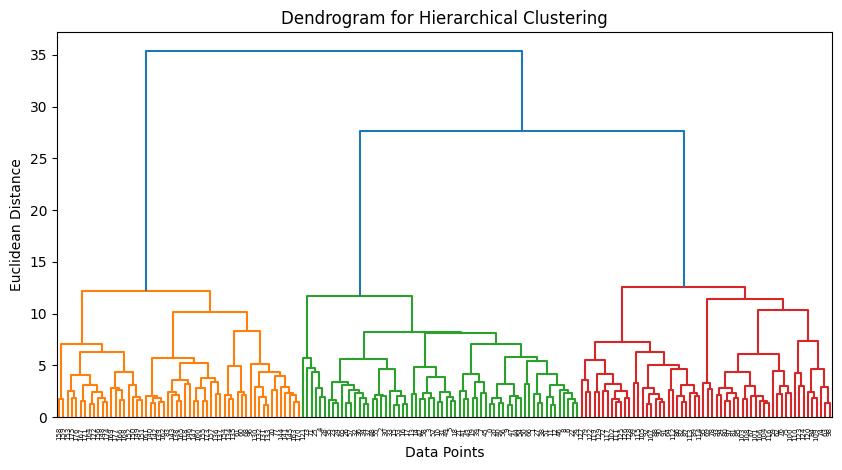

In [35]:
# HIERARCHICAL CLUSTERING
# Create the dendrogram
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(linkage(df_scaled, method='ward'))
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

In [36]:
# Assign clusters based on the dendrogram cutoff
hierarchical_clusters = fcluster(linkage(df_scaled, method='ward'), t=optimal_k, criterion='maxclust')
df["Hierarchical_Cluster"] = hierarchical_clusters

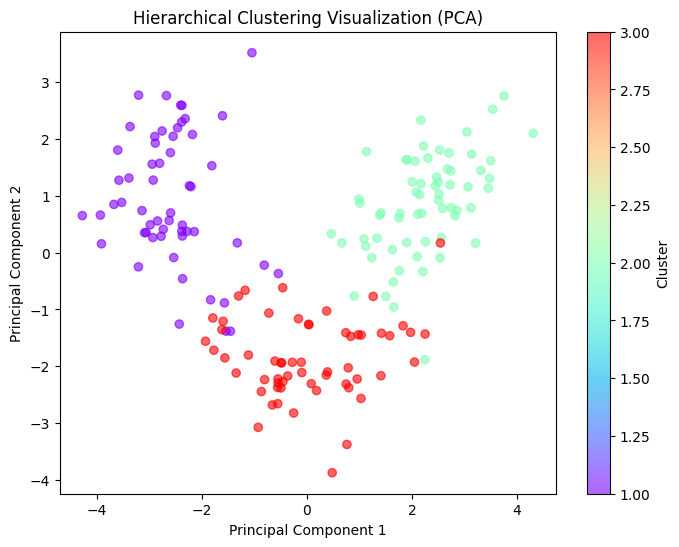

In [37]:
# Visualizing Hierarchical Clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["Hierarchical_Cluster"], cmap="rainbow", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Hierarchical Clustering Visualization (PCA)")
plt.colorbar(label="Cluster")
plt.show()

In [38]:
# DBSCAN CLUSTERING
# Apply DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)

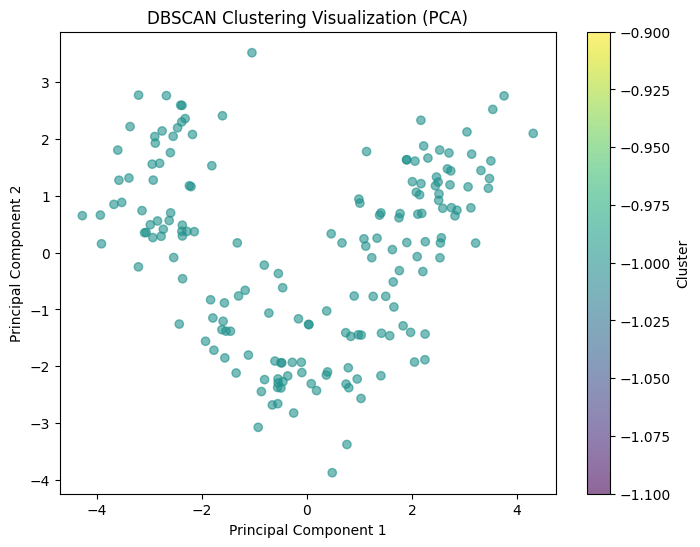

In [40]:
# Visualizing DBSCAN Clusters using PCA
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df["DBSCAN_Cluster"], cmap="viridis", alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.colorbar(label="Cluster")
plt.show()

In [42]:
# Display cluster counts
print("K-Means Cluster Counts:\n", df["KMeans_Cluster"].value_counts())
print("\nHierarchical Cluster Counts:\n", df["Hierarchical_Cluster"].value_counts())
print("\nDBSCAN Cluster Counts:\n", df["DBSCAN_Cluster"].value_counts())

K-Means Cluster Counts:
 KMeans_Cluster
0    65
2    62
1    51
Name: count, dtype: int64

Hierarchical Cluster Counts:
 Hierarchical_Cluster
2    64
3    58
1    56
Name: count, dtype: int64

DBSCAN Cluster Counts:
 DBSCAN_Cluster
-1    178
Name: count, dtype: int64
